# Лабораторная работа 2. Композиции алгоритмов. Ранжирование.

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

### Правила сдачи
Выполненную работу следует отправить в систему Anytask. Более подробно о системе можно почитать на странице курса. Название отправляемого файла должно иметь следующий формат: Surname_Name_Group_NN.ipynb, где NN — номер лабораторной работы. Например, Kozlova_Anna_CS_02.ipynb.

## Bias-Variance decomposition. Композиции алгоритмов

![](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

Рассмотрим задачу регрессии со среднеквадратичной функцией потерь, а также некоторый алгоритм $a$. Тогда качество алгоритма $a$ может быть записано следующим образом:

$$Q(a) = \mathbb{E}_{X^l} \mathbb{E}_{x,y}(a(x) - y)^2,$$

где первое матожидание вычисляется по всевозможным обучающим выборкам $X^l$ размера $l$. К сожалению, на реальных данных эта формула неприменима из-за невозможности сгенерировать необходимые для оценки данные. Поэтому проведем приближенный численный эксперимент с эмпирическими оценками матожиданий.

С помощью бутстраппинга можно просемплировать из обучающей выборки $N$ новых выборок того же размера, тем самым "имитируя" пространство всевозможных обучающих выборок, после чего обучить на каждой выбранный алгоритм. Обозначим вектор истинных меток тестовой выборки за $y \in \mathbb{R}^{m}$. Векторы прогнозов для объектов из тестовой выборки для каждой модели обозначим за $\hat{y}_i \in \mathbb{R}^{m}, i \in \{1, .., N\}$. Тогда средний квадрат ошибки по всем моделям на тестовой выборке запишется как

$$error=\frac{1}{N}\sum_{i=1}^{N}MSE(y,\hat{y}_i).$$

Обозначим среднее предсказание за $$\overline{y} = \frac{1}{N}\sum_{i=1}^{N} \hat{y}_i.$$

Тогда квадрат отклонения среднего предсказания и разброс прогнозов относительно среднего предсказания всех моделей на тестовой выборке от истинных меток запишутся следующим образом, соответственно:

$$bias^2 = MSE(y, \overline y),$$

$$variance = \frac{1}{N}\sum_{i=1}^N MSE(\hat{y}_i, \overline y).$$


Для начала рассмотрим в качестве алгоритма решающее дерево. Как известно, при увеличении высоты дерева алгоритм может быть сильно чувствителен к составу обучающей выборки. Чтобы подтвердить эти предположения, проведите следующие эксперименты.

Загрузите [набор данных](http://archive.ics.uci.edu/ml/datasets/BlogFeedback). Каждый объект — пост в блоге. Он описывается различными признаками: длина текста поста, наличие наиболее частотных слов, день недели, количество комментариев за последние 24 часа и т.п., а так же целевым признаком — количеством комментариев к посту. Полный список признаков и описание находятся на странице датасета. 

Разбейте данные из файла **blogData_train.csv** на обучающую и тестовую выборки в пропорциях 1 к 4 соответственно. Обратите внимание, что обучающая выборка меньше тестовой. Такая большая тестовая выборка позволит сделать измерение качества моделей достаточно достоверным. 

In [163]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from tqdm import tqdm
%matplotlib inline

**(1 балл) Задание 1.** Постройте графики зависимости $error$, $bias^2$ и $variance$ от глубины решающего дерева (от 1 до 15 включительно) для $N=100$. 

In [65]:
blog_data = pd.read_csv('BlogFeedback/blogData_train.csv', header=None)
blog_data.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


Делим данные на обучение и тест.

In [66]:
blog_data.fillna(0, inplace=True)
data = np.array(blog_data.iloc[:, :-1])
target = np.array(blog_data.iloc[:,-1])

In [68]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 4 / 5)

Для каждой глубины дерева находим $bias^2$, $variance$ и $error$

In [75]:
from sklearn.tree import DecisionTreeRegressor
predictions = []
biases = []
variances = []
errors = []
count = 100
indeces_range = np.arange(len(train_data))
depths = np.arange(1, 16)

for depth in depths:
    errors_depth = []
    predictions = []
    for i in range(count):
        new_indeces = np.random.choice(indeces_range, len(train_data))
        new_train_data = train_data[new_indeces]
        new_train_target = train_target[new_indeces]
        model = DecisionTreeRegressor(max_depth=depth)
        model.fit(new_train_data, new_train_target)
        pred = model.predict(test_data)
        predictions.append(pred)
        errors_depth.append(np.mean((test_target - pred) ** 2))
    predictions = np.array(predictions)
    y_mean = predictions.mean(axis=0)
    biases.append(np.mean((test_target - y_mean) ** 2))
    variances.append(np.mean(np.mean((predictions - y_mean) ** 2, axis=-1)))
    errors.append(np.mean(errors_depth))



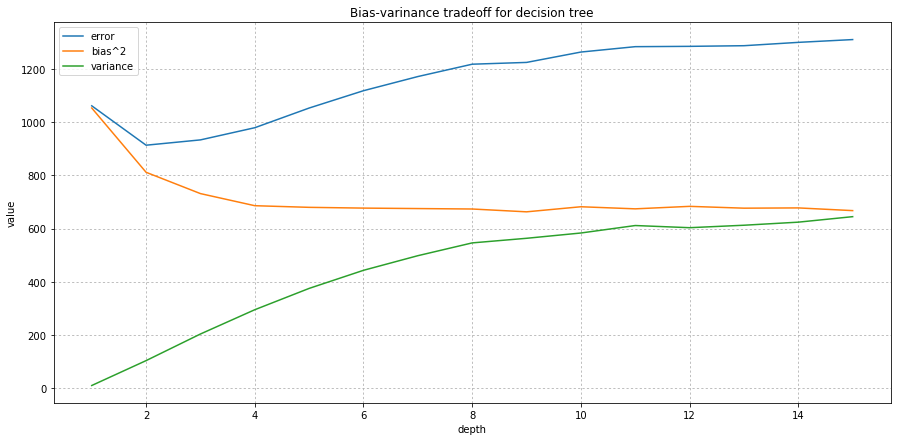

In [76]:
plt.figure(figsize=(15,7))
plt.plot(depths, errors, label='error')
plt.plot(depths, biases, label='bias^2')
plt.plot(depths, variances, label='variance')
plt.xlabel('depth')
plt.ylabel('value')
plt.title('Bias-varinance tradeoff for decision tree')
plt.legend()
plt.grid(ls=':')
plt.show()

**(0.5 балла) Задание 2.** Являются ли какие-то из полученных графиков монотонными? А должны ли они быть монотонными, если бы гипотетически эксперименты были проведены на всевозможных выборках? Почему? Убедитесь численно, что верно bias-variance разложение ошибки: $$error = bias^2 + variance$$

График $bias^2$ с ростом сложности алгоритма (глубины дерева) уменьшается, как и должно быть, так при использовании сложных моделей мы получаем в среднем более хорошее предсказание. График variance увеличивается с ростом глубины. Это тоже нормально, так как при использовании сложных моделей мы все больше подстраиваемся под обучающую выборку и получаем большой разьрос на тесте. Также можно заметить, что ошибка начинает увеличиваться, начиная с 2. То есть получаем, что в дереве нам не выгодно брать большую глубину, так как это приводит к переобучению, что мы и так знали.

Убедимся в верности bias-varianve разложения.

In [85]:
epsilon = 0.1
print('error = bias2+variance : {}'.format((np.abs(np.array(biases) + np.array(variances) - errors) < epsilon).all()))

error = bias2+variance : True


## Композиции алгоритмов

Несмотря на описанный выше недостаток решающих деревьев, объединение их в композиции позволяет существенно улучшить качество предсказания. Рассмотрим несколько способов построения композиций.

### Bagging + RSM

![](https://sites.google.com/site/rajhansgondane2506/_/rsrc/1467898300734/publications/rrftrain.jpg?height=215&width=320)

Один из способов объединения алгоритмов в композиции — обучение каждого отдельного алгоритма на некоторой подвыборке из исходной выборки ([bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)) и подмножестве исходных признаков ([RSM](https://en.wikipedia.org/wiki/Random_subspace_method)). В sklearn этот тип композиции реализован в классе [BaggingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html) (для случая регресии). Подобный подход также есть в реализации [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

### Градиентный бустинг

В случае бустинга композиция алгоритмов строится последовательно. Каждый следующий базовый алгоритм акцентируется на тех объектах, на которых обученная ранее композиция допускала ошибку.

На данный момент одной из самых широко распространенных реализаций бустинга является библиотека [XGBoost](https://github.com/dmlc/xgboost). В ней большое внимание уделяется регуляризации и скорости, нежели в других реализациях бустинга (например,  [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) из sklearn). Кроме того, XGBoost позволяет оптимизировать различные функции потерь, а также более гибок, засчет большого числа параметров.

XGBoost строит композицию из $K$ базовых алгоритмов $b_k$:

$$ \hat{y}_i = \hat{y}_i^{K} = \sum_{k=1}^{K} b_k(x_i) = \hat{y}_i^{\left(K - 1\right)} + b_K(x_i), $$

минимизируя следующий функционал:

$$ Obj = \sum_{i=1}^N \mathcal{L}(y_i, \hat{y}_i ) + \sum_{k=1}^{K} \Omega(b_k),$$

где
 - $N$ — размер обучающей выборки;
 - $x_i, y_i, \hat{y}_i$ — i-ый объект, правильный ответ и предсказание модели для него;
 - $\hat{y}_i^{t}$ — предсказание композиции из $t$ уже обученных базовых алгоритмов для i-го объекта;
 - $\Omega$ — регуляризатор;
 - $\mathcal{L}(y_i, \hat{y}_i)$ — функция потерь.

Функционал, оптимизируемый на $t$-ой итерации:

$$ Obj^{(t)} = \sum_{i=1}^N \mathcal{L}\left(y_i, \hat{y}_i^{(t-1)} + b_t(x_i)\right) + \Omega(b_t).$$

В XGBoost реализовано несколько различных функций потерь, что позволяет решать задачи классификации (бинарной и мультиклассовой), регрессии и ранжирования. Вот некоторые из них:

- reg:linear — линейная регрессия
- reg:logistic — логистическая регрессия
- binary:logistic — логистическая регрессия
- multi:softmax — softmax функция потерь для многоклассовой классификации
- rank:pairwise — минимизация pairwise-функции потерь для задачи ранжирования

**(1 балл) Задание 3.** Проведите аналогичный эксперимент с bias-variance разложением для градиентного бустинга для количество алгоритмов 1, 5, 10, 25 и 50, используя в качестве базовых алгоритмов решающие деревья. Обратите внимание, что данная библиотека имеет два интерфейса (стандартный и аналог sklearn), названия параметров в которых могут отличаться.

In [89]:
import xgboost
predictions = []
biases = []
variances = []
errors = []
count = 100
indeces_range = np.arange(len(train_data))
count_algs = [1, 5, 10, 25, 50]

for algs in count_algs:
    errors_depth = []
    predictions = []
    for i in range(count):
        new_indeces = np.random.choice(indeces_range, len(train_data))
        new_train_data = train_data[new_indeces]
        new_train_target = train_target[new_indeces]
        model = xgboost.XGBRegressor(n_estimators=algs)
        model.fit(new_train_data, new_train_target)
        pred = model.predict(test_data)
        predictions.append(pred)
        errors_depth.append(np.mean((test_target - pred) ** 2))
    predictions = np.array(predictions)
    y_mean = predictions.mean(axis=0)
    biases.append(np.mean((test_target - y_mean) ** 2))
    variances.append(np.mean(np.mean((predictions - y_mean) ** 2, axis=-1)))
    errors.append(np.mean(errors_depth))


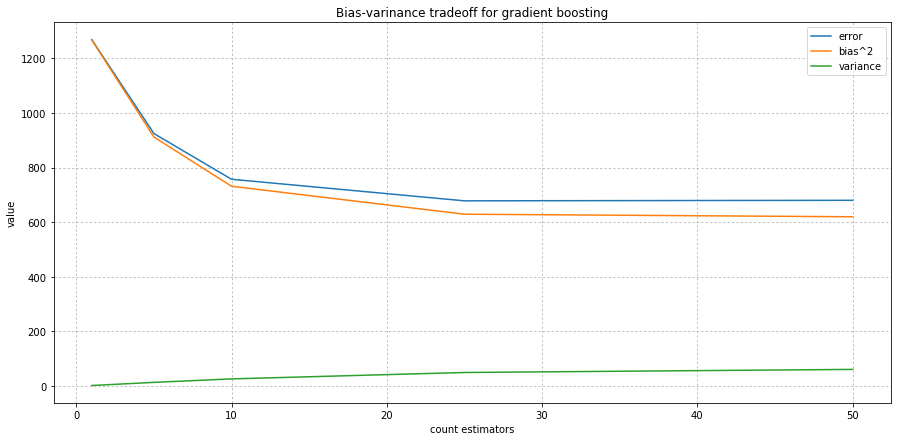

In [91]:
plt.figure(figsize=(15,7))
plt.plot(count_algs, errors, label='error')
plt.plot(count_algs, biases, label='bias^2')
plt.plot(count_algs, variances, label='variance')
plt.xlabel('count estimators')
plt.ylabel('value')
plt.title('Bias-varinance tradeoff for gradient boosting')
plt.legend()
plt.grid(ls=':')
plt.show()

**(0.5 балла) Задание 4.** Отличаются ли графики в рассмотренных моделях (решающее дерево, градиентный бустинг на решающих деревьях)  между собой? На какую компоненту из разложения ошибки влияет объединение алгоритмов в рассмотренный тип композиции? Поясните свой ответ.

Здесь, как и на предыдущем графике, $bias^2$ уменьшается с ростом сложности модели (кол-ва базовых алгоритмов), а variance увеличается. В отличие от предыдущего графика здесь ошибка уменьшается сростом сложности. Этот факт говорит нам о том, что в бустинге нам выгодно брать много базовых алгоритмов.

In [92]:
epsilon = 0.1
print('error = bias2+variance : {}'.format((np.abs(np.array(biases) + np.array(variances) - errors) < epsilon).all()))

error = bias2+variance : True


### Стекинг
![](https://4.bp.blogspot.com/-hCxAb57kzDQ/VuMgHy3hAhI/AAAAAAAAAVk/djmL9IHv5QkLWeudjE50qDoCTbiUrTetA/s1600/Stacking.jpg)

[Stacking](https://en.wikipedia.org/wiki/Ensemble_learning#Stacking) — еще один способ объединить несколько алгоритмов в один, который часто используется как в решении реальных задач из промышленной сферы, так и в конкурсах на платформах вроде Kaggle. Подход использует понятие *базовых классификаторов*, каждый из которых независимо обучается на некотором (возможно одном и том же) множестве признаков, а также *мета-классификатора*, использующего предсказания базовых классификаторов как факторы. 

Загрузите [датасет](https://archive.ics.uci.edu/ml/datasets/covertype). В тренировочных целях предлагается вместо задачи мультиклассификации решать задачу обычной бинарной классификации — научиться отличать **Spruce-Fir** (значение целевой переменной — 1) от **Lodgepole Pine** (значение целевой переменной — 2). Разделите выборку на обучение и тест в соотношении 50/50. В качестве метрики используйте [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

**(1 балл) Задание 5.** Использование мета-классификатора подразумевает получение предсказаний от базовых классификаторов для тех объектов обучающей выборки, на которых мета-классификатор будет обучаться. В свою очередь базовые классификаторы тоже должны быть обучены на некоторой выборке. Чтобы избежать переобучения, обучающее множество делится на $n$ фолдов, $(n-1)$ из которых используются для обучения базовых классификаторов, а $n$-ый — для предсказания (вычисления мета-фактора).

Для получения мета-факторов для тестовых данных базовые классификаторы могут быть обучены на всем обучающем множестве, поскольку проблема переобучения здесь не возникает. Другими словами, если мы хотим посчитать факторы для тестового множества, мы можем спокойно использовать обучающее множество для тренировки базовых классификаторов. Если же мы хотим посчитать факторы для обучающего множества, то необходимо следить, чтобы классификатор не предсказывал для тех объектов, на которых обучался.

Мета-классификатор может быть обучен как на множестве исходных факторов, дополненным мета-факторами, так и исключительно на множестве мета-факторов. Выбор зависит от решаемой задачи.

Напишите функцию, которая получает на вход классификатор, обучающую и тестовые выборки, а также параметры [кросс-валидатора](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) и возвращающую значения мета-фактора для обучающего и тестового множеств

In [98]:
data_forest = pd.read_csv('covtype.data', header=None)
data_forest.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [100]:
data = np.array(data_forest.iloc[:,:-1])
target = np.array(data_forest.iloc[:,-1])

Уберем все строки со значением целевой переменной не 1 или 2 и разделим полученное на обучение и тест.

In [105]:
small_data = data[(target == 1) + (target == 2)]
small_target = target[(target == 1) + (target == 2)]

train_data, test_data, train_target, test_target = train_test_split(small_data, small_target, test_size=0.5)

In [192]:
DecisionTreeClassifier(*[], **{})

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Функция для обучения классификатора: предсказываем мета-факторы для каждого фолда отдельно, обучая на всем без этого фолда. Также предсказываем все тестовые мета-факторы, обучаясь на всем трейне.

In [196]:
from sklearn.model_selection import KFold

def compute_meta_feature(clf, X_train, X_test, y_train, cv, *args, **kwargs):
    splitting = cv.split(X_train)
    meta_features_train = []
    for train_index, test_index in splitting:
        base_clf = clf(*args, **kwargs)
        base_clf.fit(X_train[train_index], y_train[train_index])
        if len(meta_features_train) == 0:
            meta_features_train = base_clf.predict_proba(X_train[test_index])
            meta_y_train =  y_train[test_index]
        else:
            meta_features_train = np.vstack((meta_features_train, base_clf.predict_proba(X_train[test_index])))
            meta_y_train = np.hstack((meta_y_train, y_train[test_index]))
    base_clf = clf(*args, **kwargs)
    base_clf.fit(X_train, y_train)
    meta_features_test = base_clf.predict_proba(X_test)
    return meta_features_train, meta_y_train , meta_features_test
    

Поэкспериментируйте со стекингом, ответьте на вопросы и обоснуйте наблюдения:
  - **(1 балл) Задание 6.** Обучите различные известные вам модели машинного обучения и сделайте из них стекинг-композицию. 
  
  Базовые алгоритмы могут отличаться друг от друга:
    - моделью машинного обучения,
    - гиперпараметрами (например, различные функции потерь или глубины деревьев),
    - набором факторов,
    - типом модели: для данной задачи можно использовать как классификаторы, так и регрессоры.
  
  Обратите внимание, что бинарные мета-факторы дают меньше полезного сигнала мета-классификатору, чем числовые, поэтому базовым классификаторам лучше возвращать вероятность/числовую функцию, чем метки классов.

Сначала напишем для себя безлайн, чтобы было с чем сравнивать

In [200]:
clf = xgboost.XGBClassifier()
clf.fit(train_data, train_target)
accuracy_score(test_target, clf.predict(test_data))

0.796401840280162

In [194]:
import warnings
warnings.filterwarnings("ignore")

Теперь попробуем рассмотреть 6 базовых алгоритмов : Решающее дерево, логистическая регрессия, решающее дерево с заданной максимальной глубиной 10, градиентные бустинги из xgboost с кол-вами базовых алгоритмов 5 и 15 и Random forest из 10ти деревьев. Также рассмотрим разное кол-во фолдов и множество различных мета-классификаторов

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


all_meta_features_train = []
all_meta_features_test = []
n_splits = np.arange(3, 8)

meta_clfs = [LogisticRegression(), DecisionTreeClassifier(), 
             xgboost.XGBClassifier(n_estimators=5), xgboost.XGBClassifier(n_estimators=10), 
             xgboost.XGBClassifier(n_estimators=20),  xgboost.XGBClassifier(n_estimators=40),
             RandomForestClassifier(n_estimators=10), RandomForestClassifier(n_estimators=40),
             LinearSVC()]
meta_names = ['LogisticRegression', 'DecisionTreeClassifier', 'XGBClassifier with 5 estimators',
             'XGBClassifier with 10 estimators', 'XGBClassifier with 20 estimators', 
             'XGBClassifier with 40 estimators', 'RandomForestClassifier with 10 estimators', 
             'RandomForestClassifier with 40 estimators', 'LinearSVC']

base_clfs = [DecisionTreeClassifier, LogisticRegression, DecisionTreeClassifier, 
             xgboost.XGBClassifier, xgboost.XGBClassifier,
             RandomForestClassifier]

base_args = [[[], {}], [[], {}], [[], {'max_depth' : 10}], [[], {'n_estimators' : 5}], [[], {'n_estimators' : 15}],
            [[], {'n_estimators' : 10}]]

for n_split in n_splits:
    cv = KFold(n_splits=n_split)
    for i, clf in enumerate(base_clfs):

        meta_features_train, meta_y_train, meta_features_test = compute_meta_feature(clf, train_data, test_data, 
                                                                                     train_target, cv, *(base_args[i][0]),
                                                                                     **(base_args[i][1]))
        
        if i == 0:
            all_meta_features_train = meta_features_train
            all_meta_features_test = meta_features_test
        else:
            all_meta_features_train = np.hstack((all_meta_features_train, meta_features_train))
            all_meta_features_test = np.hstack((all_meta_features_test, meta_features_test))

        
    for i, meta_clf in enumerate(meta_clfs):
            meta_clf.fit(all_meta_features_train, meta_y_train)
            predict = meta_clf.predict(all_meta_features_test)
            acc = accuracy_score(test_target, predict)
            print('{}, count splits = {},  accuracy = {}'.format(meta_names[i], n_split, acc))
    


LogisticRegression, count splits = 3,  accuracy = 0.9554107710515367
DecisionTreeClassifier, count splits = 3,  accuracy = 0.9203056900848645
XGBClassifier with 5 estimators, count splits = 3,  accuracy = 0.9544171167059147
XGBClassifier with 10 estimators, count splits = 3,  accuracy = 0.9544171167059147
XGBClassifier with 20 estimators, count splits = 3,  accuracy = 0.9552572797298553
XGBClassifier with 40 estimators, count splits = 3,  accuracy = 0.9555440661466812
RandomForestClassifier with 10 estimators, count splits = 3,  accuracy = 0.9493438245998118
RandomForestClassifier with 40 estimators, count splits = 3,  accuracy = 0.9529266351874816
LinearSVC, count splits = 3,  accuracy = 0.9559560691680367
LogisticRegression, count splits = 4,  accuracy = 0.9559924223758033
DecisionTreeClassifier, count splits = 4,  accuracy = 0.9173449232745354
XGBClassifier with 5 estimators, count splits = 4,  accuracy = 0.954469626894911
XGBClassifier with 10 estimators, count splits = 4,  accurac

Лучше всего себя в качестве мета-классификатора показывает LinearSVC, LogisticRegression и XGBClassifier with 40 estimators. Также можно заметить, что мы сильно улучшили качество по сравнению с бейзлайном.


  - **(1 балл) Задание 7.** Обучите мета-классификатор на различных наборах факторов:
    - исходные факторы,
    - исходные факторы + мета-факторы,
    - мета-факторы.
    
    Имеет ли смысл добавлять исходные факторы в мета-классификатор, если базовые классификаторы уже обучены на этом наборе? Удается ли добиться улучшения качества за счет стекинга? Какие классификаторы лучше сочетаются друг с другом в такой композиции?
  - **(0.5 балла) Задание 8.** Попробуйте разные размеры фолда при подсчете мета-факторов. Влияет ли размер на качество?
  - **(0.5 балла) Задание 9.** Зафиксируйте некоторый набор базовых классификаторов. Обучите поверх них линейную модель и сравните ее с мета-классификатором, который считает среднее по всем метафакторам. Дает ли преимущество линейная модель? О чем говорят коэффициенты линейной модели в данном случае?


Для выполнения задания 7 выберем 3 мета-классификатора, которые ранее показали результат чуть лучше, чем остальные.


In [209]:
all_meta_features_train = []
all_meta_features_test = []

meta_clfs = [LogisticRegression, xgboost.XGBClassifier, LinearSVC]
meta_names = ['LogisticRegression','XGBClassifier with 40 estimators', 'LinearSVC']
meta_args = [[[], {}],[[], {'n_estimators' : 40}], [[], {}]]


cv = KFold(n_splits=4)
for i, clf in enumerate(base_clfs):

    meta_features_train, meta_y_train, meta_features_test = compute_meta_feature(clf, train_data, test_data, train_target, 
                                                                                 cv, *(base_args[i][0]), 
                                                                                 **(base_args[i][1]))

    if i == 0:
        all_meta_features_train = meta_features_train
        all_meta_features_test = meta_features_test
    else:
        all_meta_features_train = np.hstack((all_meta_features_train, meta_features_train))
        all_meta_features_test = np.hstack((all_meta_features_test, meta_features_test))
        
for i, meta_clf in enumerate(meta_clfs):
    clf = meta_clf(*meta_args[i][0], **meta_args[i][1])
    clf.fit(all_meta_features_train, train_target)
    predict = clf.predict(all_meta_features_test)
    acc = accuracy_score(test_target, predict)
    print('{} trained on meta features,  accuracy = {}'.format(meta_names[i], acc))
    
    clf = meta_clf(*meta_args[i][0], **meta_args[i][1])
    addition_features_train = np.hstack((all_meta_features_train, train_data))
    addition_features_test = np.hstack((all_meta_features_test, test_data))
    clf.fit(addition_features_train, train_target)
    predict = clf.predict(addition_features_test)
    acc = accuracy_score(test_target, predict)
    print('{} trained on meta + initial features,  accuracy = {}'.format(meta_names[i], acc))
    
    clf = meta_clf(*meta_args[i][0], **meta_args[i][1])
    clf.fit(train_data, train_target)
    predict = clf.predict(test_data)
    acc = accuracy_score(test_target, predict)
    print('{} trained on initial features,  accuracy = {}'.format(meta_names[i], acc))



LogisticRegression trained on meta features,  accuracy = 0.954449430668374
LogisticRegression trained on meta + initial features,  accuracy = 0.954380763498148
LogisticRegression trained on initial features,  accuracy = 0.7732004152344176
XGBClassifier with 40 estimators trained on meta features,  accuracy = 0.9547321778398924
XGBClassifier with 40 estimators trained on meta + initial features,  accuracy = 0.9546998638774331
XGBClassifier with 40 estimators trained on initial features,  accuracy = 0.7846920681339898
LinearSVC trained on meta features,  accuracy = 0.9546998638774331
LinearSVC trained on meta + initial features,  accuracy = 0.9399606577507058
LinearSVC trained on initial features,  accuracy = 0.7206457945397482


Как видим, польза от стекинга огромная. Все мета-классификаторы в разы лучше работают на мета-факторах, чем без них. Кроме того, можно заметить, что качество при добавлении начальных факторов совсем не улучшается и даже немного ухудшается. Отсюда следует, что они излишни, так как базовые алгоритмы уже собрали из них почтю всю нужную информацию. Конечно, если бы мы выбрали слабые базовые алгоритмы и сильный мета-классификатор, то в добавлении исходных признаков смысл, наверное, был бы, так как слабые базовые алгоритмы не способны найти сложные закономерности в данных. Однако в данном случае, когда базовые алгоритмы сравнимы с мета-алгоритмом по сложности, в этом смысла нет.

Чтобы понять какие классификаторы лучше сочетаются друг с другом в такой композиции попробуем поперебирать разные базовые алгоритмы, чего мы еще не делали.

In [252]:
from itertools import combinations

models_range = np.arange(6)
model_combinations = list(combinations(models_range, 2)) + list(combinations(models_range, 3)) + list(combinations(models_range, 4)) + list(combinations(models_range, 5)) + list(combinations(models_range, 6))

base_clfs = np.array(base_clfs)
base_args = np.array(base_args)

# evaluate meta-features for each base learner
cv = KFold(n_splits=3)
clfs_meta_features_train = []
clfs_meta_features_test = []
for i, clf in enumerate(base_clfs):
        meta_features_train, meta_y_train, meta_features_test = compute_meta_feature(clf, train_data, test_data, train_target, 
                                                                                     cv, *(base_args[i][0]), 
                                                                                     **(base_args[i][1]))

        clfs_meta_features_train.append(meta_features_train)
        clfs_meta_features_test.append(meta_features_test)
        
clfs_meta_features_train = np.array(clfs_meta_features_train)
clfs_meta_features_test = np.array(clfs_meta_features_test)
for model_inds in model_combinations:
    
    all_meta_features_train = np.hstack(clfs_meta_features_train[list(model_inds)])
    all_meta_features_test = np.hstack(clfs_meta_features_test[list(model_inds)])
    
    meta_clf = xgboost.XGBClassifier()
    meta_clf2 = LogisticRegression()
    meta_clf.fit(all_meta_features_train, train_target)
    predict1 = meta_clf.predict(all_meta_features_test)
    acc1 = accuracy_score(test_target, predict1)
    accs1.append(acc1)
    
    meta_clf2.fit(all_meta_features_train, train_target)
    predict2 = meta_clf2.predict(all_meta_features_test)
    acc2 = accuracy_score(test_target, predict2)
    accs2.append(acc2)
    
    all_meta_features_train = []
    all_meta_features_test = []
    
    print('model_combination = {}, XGBClassifier accuracy : {}, LogisticRegression accuracy : {}'.format(model_inds, 
                                                                                                         round(acc1, 5),
                                                                                                         round(acc2, 5)))


model_combination = (0, 1), XGBClassifier accuracy : 0.93759, LogisticRegression accuracy : 0.9376
model_combination = (0, 2), XGBClassifier accuracy : 0.93761, LogisticRegression accuracy : 0.9376
model_combination = (0, 3), XGBClassifier accuracy : 0.9376, LogisticRegression accuracy : 0.9376
model_combination = (0, 4), XGBClassifier accuracy : 0.93761, LogisticRegression accuracy : 0.9376
model_combination = (0, 5), XGBClassifier accuracy : 0.95487, LogisticRegression accuracy : 0.95487
model_combination = (1, 2), XGBClassifier accuracy : 0.832, LogisticRegression accuracy : 0.83213
model_combination = (1, 3), XGBClassifier accuracy : 0.77721, LogisticRegression accuracy : 0.7757
model_combination = (1, 4), XGBClassifier accuracy : 0.77943, LogisticRegression accuracy : 0.7771
model_combination = (1, 5), XGBClassifier accuracy : 0.9475, LogisticRegression accuracy : 0.94701
model_combination = (2, 3), XGBClassifier accuracy : 0.83138, LogisticRegression accuracy : 0.83186
model_comb

Видим, что выгодней выбирать не всех сразу, а взять (0, 1, 3, 4, 5), (0, 1, 2, 3, 5) или (0, 1, 3, 5).
Возьмем, например, (0, 1, 3, 4, 5), то есть выкинем DecisionTreeClassifier с максимальной глубиной в 10.

Перейдем к заданию 8. Посмотрим на разное кол-во фолдов при подсчете мета-факторов.

In [215]:
all_meta_features_train = []
all_meta_features_test = []

accs1 = []
accs2 = []
n_splits = np.arange(2, 10)
for n_split in n_splits:
    cv = KFold(n_splits=n_split)
    for i, clf in enumerate(base_clfs):

        meta_features_train, meta_y_train, meta_features_test = compute_meta_feature(clf, train_data, test_data, 
                                                                                     train_target, cv, *(base_args[i][0]),
                                                                                     **(base_args[i][1]))
        
        if i == 0:
            all_meta_features_train = meta_features_train
            all_meta_features_test = meta_features_test
        else:
            all_meta_features_train = np.hstack((all_meta_features_train, meta_features_train))
            all_meta_features_test = np.hstack((all_meta_features_test, meta_features_test))

        
    meta_clf = xgboost.XGBClassifier()
    meta_clf2 = LogisticRegression()
    meta_clf.fit(all_meta_features_train, train_target)
    predict1 = meta_clf.predict(all_meta_features_test)
    acc1 = accuracy_score(test_target, predict1)
    accs1.append(acc1)
    
    meta_clf2.fit(all_meta_features_train, train_target)
    predict2 = meta_clf2.predict(all_meta_features_test)
    acc2 = accuracy_score(test_target, predict2)
    accs2.append(acc2)


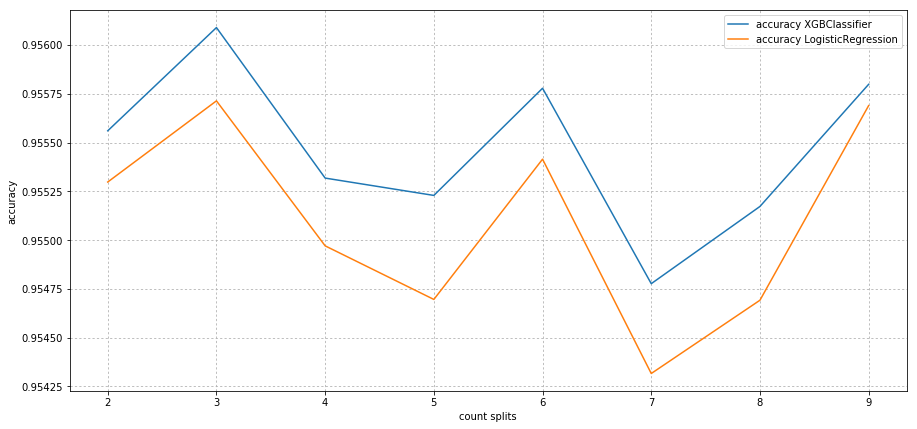

In [214]:
plt.figure(figsize=(15,7))
plt.plot(n_splits, accs1, label='accuracy XGBClassifier')
plt.plot(n_splits, accs2, label='accuracy LogisticRegression')
plt.xlabel('count splits')
plt.ylabel('accuracy')
plt.legend()
plt.grid(ls=':')
plt.show()

Немного странно, кажется, что при увиличении кол-ва фолдов качество должно увеличиваться, так как в этом случае базовые классификаторы обучаются на большем числе данных. Однако такой тенденции здесь не видно. Возможно это связано с неудачным разбаением данных на фолды. Если посмотреть на масштаб графика, то можно понять, что это изменение в accuracy совсем мало и можно считать, что качество не меняется при изменении кол-ва фолдов.

Задание 9.

Найдем мета-факторы для наилучшей комбинации базовых алгоритмов и наилучшего кол-во сплитов в KFold. Возьмем в качестве линейной модели логистическую регрессию. <br>
Не будем считать мета-факторы деще раз, так как они уже посчитаны ранее для данных базовых алгоритмов.

In [254]:
all_meta_features_train = []
all_meta_features_test = []

base_clfs = [DecisionTreeClassifier, LogisticRegression, 
             xgboost.XGBClassifier, xgboost.XGBClassifier,
             RandomForestClassifier]


all_meta_features_train = np.hstack(clfs_meta_features_train[[0, 1, 3, 4, 5]])
all_meta_features_test = np.hstack(clfs_meta_features_test[[0, 1, 3, 4, 5]])
        
meta_clf = LogisticRegression()
meta_clf.fit(all_meta_features_train, train_target)
predict = meta_clf.predict(all_meta_features_test)
acc_linear = accuracy_score(test_target, predict)

proba_1 = np.mean(all_meta_features_test[:,np.arange(0, all_meta_features_test.shape[1], 2)], axis=-1)
proba_2 = np.mean(all_meta_features_test[:,np.arange(1, all_meta_features_test.shape[1], 2)], axis=-1)
predict_mean = np.ones(test_target.shape)
predict_mean[proba_2 > 0.5] = 2

acc_mean = accuracy_score(test_target, predict_mean)
    
print('Logistic regression, accuracy : {}'.format(acc_linear))
print('Mean of base learners, accuracy : {}'.format(acc_mean))

Logistic regression, accuracy : 0.9563438367175477
Mean of base learners, accuracy : 0.9306946290155147


Получили, что логистическая регрессия над базовыми алгоритмами дает результат сильно лучше, чем простое усреднение ответов базовых алгоритмов.

Посмотрим на коэффициенты, полученные после обучения логистической регрессии.

In [255]:
meta_clf.coef_

array([[-1.13195155,  1.11151653,  0.3347558 , -0.35519081,  0.98111756,
        -1.00155246,  0.2281055 , -0.2485403 , -4.14179855,  4.12136354]])

Можно заметить, что коэ-ты с номерами $2i$ и $2i +1$ очень похожи по модулю друг на друга. Вспомним, что каждый из базовых алгоритмов в моей реализации возвращает пару - 2 вероятности принадлежности к классу. Отсюда можно понять, что данные веса показываю то, начколько можно доверять базовому алгоритму. Например, первому (DecisionTreeClassifier), третьему (XGBClassifier с 5 estimators) и последнему (RandomForestClassifier с 10 estimators) логистическая регрессия доверяет больше всего. 

## Поисковое ранжирование

![](http://i.imgur.com/2QnD2nF.jpg)

Задачу поискового ранжирования можно описать следующим образом: имеется множество документов $d \in D$ и множество запросов $q \in Q$. Требуется оценить *степень релевантности* документа по отношению к запросу: $(q, d) \mapsto r$, относительно которой будет производиться ранжирование. Для восстановления этой зависимости используются методы машинного обучения. Обычно используется три типа:
 - признаки запроса $q$, например: мешок слов текста запроса, его длина, ...
 - документа $d$, например: значение PageRank, мешок слов, доменное имя, ...
 - пары $(q, d)$, например: число вхождений фразы из запроса $q$ в документе $d$, ...

Одна из отличительных особенностей задачи ранжирования от классических задач машинного обучения заключается в том, что качество результата зависит не от предсказанных оценок релевантности, а от порядка следования документов в рамках конкретного запроса, т.е. важно не абсолютное значение релевантности (его достаточно трудно формализовать в виде числа), а то, более или менее релевантен документ, относительно других документов.
### Подходы к решению задачи ранжирования
Существуют 3 основных подхода, различие между которыми в используемой функции потерь:
  
1. **Pointwise подход**. В этом случае рассматривается *один объект* (в случае поискового ранжирования - конкретный документ) и функция потерь считается только по нему. Любой стандартный классификатор или регрессор может решать pointwise задачу ранжирования, обучившись предсказывать значение таргета. Итоговое ранжирование получается после сортировки документов к одному запросу по предсказанию такой модели.
2. **Pairwise подход**. В рамках данной модели функция потерь вычисляется по *паре объектов*. Другими словами, функция потерь штрафует модель, если отражированная этой моделью пара документов оказалась в неправильном порядке.
3. **Listwise подход**. Этот подход использует все объекты для вычисления функции потерь, стараясь явно оптимизировать правильный порядок.

### Оценка качества

Для оценивания качества ранжирования найденных документов в поиске используются асессорские оценки. Само оценивание происходит на скрытых от обучения запросах $Queries$. Для этого традиционно используется метрика *DCG* ([Discounted Cumulative Gain](https://en.wikipedia.org/wiki/Discounted_cumulative_gain)) и ее нормализованный вариант — *nDCG*, всегда принимающий значения от 0 до 1.
Для одного запроса DCG считается следующим образом:
$$ DCG = \sum_{i=1}^P\frac{(2^{rel_i} - 1)}{\log_2(i+1)}, $$

где $P$ — число документов в поисковой выдаче, $rel_i$ — релевантность (асессорская оценка) документа, находящегося на i-той позиции.

*IDCG* — идеальное (наибольшее из возможных) значение *DCG*, может быть получено путем ранжирования документов по убыванию асессорских оценок.

Итоговая формула для расчета *nDCG*:

$$nDCG = \frac{DCG}{IDCG} \in [0, 1].$$

Чтобы оценить значение *nDCG* на выборке $Queries$ ($nDCG_{Queries}$) размера $N$, необходимо усреднить значение *nDCG* по всем запросам  выборки:
$$nDCG_{Queries} = \frac{1}{N}\sum_{q \in Queries}nDCG(q).$$

Пример реализации метрик ранжирование на python можно найти [здесь](https://gist.github.com/mblondel/7337391).

Загрузите данные конкурса [Интернет-математика 2009](http://imat2009.yandex.ru/datasets). Там же находится описание данных. Сами данные можно скачать [здесь](https://www.dropbox.com/s/xj3g18s01m1euzl/imat2009.tar.bz2?dl=0). Разбейте обучающую выборку на обучение и контроль в соотношении 70 / 30. Обратите внимание на формат данных: разбивать необходимо множество запросов, а не строчки датасета.

In [43]:
with open('imat2009-datasets/imat2009_learning.txt', 'r') as f:
    lines = f.readlines()
    
features_vectors = []
for line in lines:
    line = line.strip()
    features, query = line.strip().split('#')
    
    features = features.split()
    rel = float(features[0])
    
    feature_vector = np.zeros(245)
    for feature in features[1:]:
        name, value = feature.split(':')
        feature_vector[int(name) - 1] = float(value)
    features_vectors.append(np.hstack(([rel, int(query)], feature_vector)))
    


In [44]:
columns = ['rel', 'query'] + list(map(str, np.arange(1, 246)))
data = pd.DataFrame(features_vectors, columns=columns)
data['query'] = list(map(int, np.array(data['query'])))
data.head()

,rel,query,1,2,3,4,5,6,7,8,...,236,237,238,239,240,241,242,243,244,245
0,1.0,3382,0.000023,0.0,0.000000,0.000000,0.0,0.0,0.704953,0.550315,...,0.032749,0.0,0.0,0.0,0.000000,0.0,0.0,0.000023,1.000000,0.000023
1,1.0,3382,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.273423,0.000000,...,0.032749,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.862745,0.000000
2,1.0,3382,0.000000,0.0,0.006800,0.051546,0.0,0.0,0.671346,0.000000,...,0.032749,0.0,0.0,0.0,0.154346,0.0,0.0,0.000000,0.811765,0.000000
3,1.0,3382,0.000000,0.0,0.000862,0.030928,0.0,0.0,0.573946,0.000000,...,0.032749,0.0,0.0,0.0,0.039509,0.0,0.0,0.000000,1.000000,0.000000
4,1.0,3382,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.261436,0.000000,...,0.032749,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.882353,0.000000


In [34]:
from sklearn.cross_validation import train_test_split

In [79]:
unique_queries = data['query'].unique()
train_queries, test_queries = train_test_split(unique_queries, test_size=3/7)
train_queries, valid_queries = train_test_split(train_queries, test_size=1/7)

train_data = data[data['query'].isin(train_queries)]
valid_data = data[data['query'].isin(valid_queries)]
test_data = data[data['query'].isin(test_queries)]

Далее рассмотрим несколько подходов предсказания релевантности. Для оценивания качества моделей используйте метрику nDCG на контроле. В случае подбора гиперпараметров используйте кросс-валидацию по 5 блокам, где разбиение должно быть по запросам, а не строчкам датасета.

**(1 балл) Задание 10.** *Pointwise* подход. Воспользовавшись известными вам техниками построения линейной регрессии, обучите модель, предсказывающую оценку асессора.

In [57]:
def DSG(y_true, y_pred, k=10):
    order = np.argsort(y_pred)[::-1]
    y_true = y_true[order[:k]]
    gains = 2 ** y_true - 1
    discount = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gains / discount)
                  
def nDSG(y_true, y_pred, k=10):
    best = DSG(y_true, y_true, k)
    actual = DSG(y_true, y_pred, k)
    return actual / best

In [58]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(np.array(train_data.iloc[:,1:]), np.array(train_data.iloc[:,0]))
prediction = reg.predict(np.array(test_data.iloc[:,1:]))

print('nDSG for linear regression = {}'.format(nDSG(np.array(test_data.iloc[:,0]), prediction)))

nDSG for linear regression = 0.8964428269060618


###  Ранжируем с XGBoost

XGBoost имеет несколько функций потерь для решения задачи ранжирования:
1. **reg:linear** — данную функцию потерь можно использовать для решения задачи ранжирование *pointwise* подходом.
2. **rank:pairwise** — в качестве *pairwise* модели в XGBoost реализован [RankNet](http://icml.cc/2015/wp-content/uploads/2015/06/icml_ranking.pdf), в котором минимизируется гладкий функционал качества ранжирования: $$ Obj = \sum_{i \prec j} \mathcal{L}\left(a(x_j) - a(x_i)\right) \rightarrow min $$ $$ \mathcal{L}(M) = log(1 + e^{-M}), $$ где $ a(x) $ - функция ранжирования. Суммирование ведется по всем парам объектов, для которых определено отношение порядка, например, для пар документов, показанных по одному запросу. Таким образом функция потерь штрафует за то, что пара объектов неправильно упорядочена.
3. **rank:map, rank:ndcg** — реализация [LambdaRank](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/MSR-TR-2010-82.pdf) для двух метрик: [MAP](https://en.wikipedia.org/wiki/Information_retrieval#Mean_average_precision) и **nDCG**. Известно, что для того, чтобы оптимизировать негладкий функционал, такой как **nDCG**,  нужно домножить градиент функционала $ Obj(a) $ на значение $\Delta NDCG_{ij} $ — изменение значения функционала качества при замене $x_i$ на $ x_j$.  Поскольку для вычисления метрик необходимы все объекты выборки, то эти две ранжирующие функции потерь являются представителями класса *listwise* моделей.

**(2 балла) Задание 11.** Обучите модели **reg:linear**, **rank:pairwise** и **rank:ndcg**, в качестве метрики оценки качества (*eval_metric*) используя *nDCG*, а в качестве бустера решающее дерево. Настройте [параметры](https://github.com/dmlc/xgboost/blob/master/doc/parameter.md) алгоритма и добейтесь высокого качества на тестовой выборке.

In [143]:
X_train = np.array(train_data.iloc[:,1:])
X_test = np.array(test_data.iloc[:,1:])
X_valid = np.array(valid_data.iloc[:,1:])
y_train = np.array(train_data.iloc[:,0])
y_test = np.array(test_data.iloc[:,0])
y_valid = np.array(valid_data.iloc[:,0])

In [152]:
def compute_groups(X):
    prev_query = X[:,0][0]
    cur_query = X[:,0][0]
    groups = []
    group = 0

    for i in range(len(X[:,0])):
        cur_query = X[:,0][i]
        if cur_query == prev_query:
            group += 1
        else:
            groups.append(group)
            group = 1
            prev_query = cur_query
    groups.append(group)
    return groups

In [153]:
groups_train = compute_groups(X_train)
groups_test = compute_groups(X_test)
groups_valid = compute_groups(X_valid)

In [155]:
import xgboost as xgb
from xgboost import DMatrix

params = {"objective" : "reg:linear", 
         "booster" : "gbtree",
         "eval_metric" : "ndcg"}

xgtrain = DMatrix(X_train, label=y_train)
xgtrain.set_group(groups_train)

xgtest = DMatrix(X_test, label=y_test)
xgtest.set_group(groups_test)

xgvalidate = DMatrix(X_valid, label=y_valid)
xgvalidate.set_group(groups_valid)

bst1 = xgb.train(params, xgtrain)
print(bst1.eval(xgtest))
print(bst3.eval(xgvalidate))

[0]	eval-ndcg:0.860544
[0]	eval-ndcg:0.853815


In [156]:
params = {"objective" : "rank:ndcg", 
         "booster" : "gbtree",
         "eval_metric" : "ndcg"}

bst2 = xgb.train(params, xgtrain)
print(bst2.eval(xgtest))
print(bst3.eval(xgvalidate))

[0]	eval-ndcg:0.852083
[0]	eval-ndcg:0.853815


In [157]:
params = {"objective" : "rank:pairwise", 
         "booster" : "gbtree",
         "eval_metric" : "ndcg"}

bst3 = xgb.train(params, xgtrain)
print(bst3.eval(xgtest))
print(bst3.eval(xgvalidate))

[0]	eval-ndcg:0.854497
[0]	eval-ndcg:0.854871


Ну, судя по всему модель rank:pairwise является самой оптимальной по валидации, поэтому для подбора параметров будем использовать именно ее. Сначала подберем learning rate и кол-во итераций, то есть кол-во деревьев.

In [161]:
nums_boost = np.arange(10, 101, 15)
etas = [0.1, 0.2, 0.3, 0.4]

for num in nums_boost:
    for eta in etas:
        params = {"objective" : "rank:pairwise", 
         "booster" : "gbtree",
         "eval_metric" : "ndcg",
                 "eta": eta}
        bst = xgb.train(params, xgtrain, num_boost_round=num)

        print('num boost = {}, eta = {}, nDSG validate = {}, nDSG test = {}'.format(num, eta, 
                                                                                    bst.eval(xgvalidate).split(':')[1],
                                                                                    bst.eval(xgtest).split(':')[1]))

num boost = 10, eta = 0.1, nDSG validate = 0.845848, nDSG test = 0.851340
num boost = 10, eta = 0.2, nDSG validate = 0.857754, nDSG test = 0.851605
num boost = 10, eta = 0.3, nDSG validate = 0.854871, nDSG test = 0.854497
num boost = 10, eta = 0.4, nDSG validate = 0.858798, nDSG test = 0.856585
num boost = 25, eta = 0.1, nDSG validate = 0.858544, nDSG test = 0.858359
num boost = 25, eta = 0.2, nDSG validate = 0.867164, nDSG test = 0.861655
num boost = 25, eta = 0.3, nDSG validate = 0.863336, nDSG test = 0.862793
num boost = 25, eta = 0.4, nDSG validate = 0.866391, nDSG test = 0.862972
num boost = 40, eta = 0.1, nDSG validate = 0.864723, nDSG test = 0.864392
num boost = 40, eta = 0.2, nDSG validate = 0.869961, nDSG test = 0.866212
num boost = 40, eta = 0.3, nDSG validate = 0.872725, nDSG test = 0.865842
num boost = 40, eta = 0.4, nDSG validate = 0.871656, nDSG test = 0.865904
num boost = 55, eta = 0.1, nDSG validate = 0.866525, nDSG test = 0.864708
num boost = 55, eta = 0.2, nDSG valida

Одно из лучших значений на валидации получилось при eta=0.3 и кол-ве итераций в 100 или 70.

Теперь подберем максимальную глубину дерева.

In [162]:
depths = np.arange(3, 10)
for depth in depths:
    params = {"objective" : "rank:pairwise", 
         "booster" : "gbtree",
         "eval_metric" : "ndcg",
              "eta": 0.3,
              "max_depth" : depth}
    bst = xgb.train(params, xgtrain, num_boost_round=70)
    print('max depths = {}, nDSG validate = {}, nDSG test = {}'.format(depth,bst.eval(xgvalidate).split(':')[1],
                                                                       bst.eval(xgtest).split(':')[1]))

max depths = 3, nDSG validate = 0.868871, nDSG test = 0.865612
max depths = 4, nDSG validate = 0.874638, nDSG test = 0.866649
max depths = 5, nDSG validate = 0.872599, nDSG test = 0.867223
max depths = 6, nDSG validate = 0.876239, nDSG test = 0.866496
max depths = 7, nDSG validate = 0.869368, nDSG test = 0.865877
max depths = 8, nDSG validate = 0.866952, nDSG test = 0.865067
max depths = 9, nDSG validate = 0.869132, nDSG test = 0.860943


Судя по валидации оптимальная длина = 6, то есть стандартное значение.

#### Пользовательская функция потерь

Библиотека XGBoost позволяет использовать пользовательские функции потерь. Для этого необходимо реализовать функцию, принимающую на вход вектор предсказанных значений и обучающую выборку, и возвращающую градиент и гессиан, посчитанный по входным данным.

Важно отметить, что XGBoost использует диагональную аппроксимацию гессиана, таким образом все недиагональные элементы считаются малозначимыми и приравниваются нулю, поэтому и градиент, и гессиан являются векторами длины размера обучающей выборки.

**(4 балла) Задание 12.** Реализуйте экспоненциальную функцию потерь для XGBoost:
$$ Obj = \sum_{i \prec j} \mathcal{L}\left(a(x_j) - a(x_i)\right) \rightarrow min $$ $$ \mathcal{L}(M) = e^{-M} $$

Обучите модель с помощью данной функции потерь, настройте параметры.

**Комментарии к реализации**

В случае ранжирования XGBoost'у необходимо знать о разбиении всех объектов на группы. В нашем случае в одну группу будут входить документы, соответствующие одному запросу. Функция, считающая градиент и гессиан по данным, должна знать данное разбиение датасета. Однако питоновский интерфейс класса *DMatrix* (в котором хранится датасет) не дает возможности получить это разбиение. В этом случае нужно реализовать функцию потерь в качестве функтора, конструктор которого принимает разбиение на группы в качестве параметра.

Пример реализации своей функции потерь можно найти на соответствующем семинаре.

Заметим, что для подсчета градиента по i-ому предсказанию нам нужно рассматривать только группу, в которой лежит i-ый объект, так как с объектами из остальных групп он не сравним. Если посмотреть на функцию потерь, то можно понять, что производная по предсказанию для объекта i - это сумма экспонент вида $e^{a(x_i) - a(x_j)}$, если $y_i < y_j$,  и $-e^{a(x_j) - a(x_i)}$, если $y_i > y_j$. 

In [158]:
class ExponentialPairwiseLoss(object):
    def __init__(self, groups):
        self.groups = groups
                        
    def __call__(self, preds, dtrain):
        true_labels = dtrain.get_label()
        begin_group = np.hstack(([0], np.cumsum(self.groups)))
        grads = np.zeros_like(preds)
        hess = np.zeros_like(preds)
        for k, group in enumerate(self.groups):
            for i in range(begin_group[k], begin_group[k+1]):
                for j in range(i + 1, begin_group[k+1]):
                    if true_labels[i] == true_labels[j]:
                        continue
                    elif true_labels[i] < true_labels[j]:
                        value = np.exp(preds[i] - preds[j])
                        grads[i] += value
                        grads[j] -= value
                    else:
                        value = np.exp(preds[j] - preds[i])
                        grads[j] += value
                        grads[i] -= value
                    hess[i] += value
                    hess[j] += value
        
        return grads, hess

Обучаемся с данной функцией потерь.

In [160]:
params =  {"booster" : "gbtree",
         "eval_metric" : "ndcg",
              "eta": 0.1,
              "max_depth" : 6,
          "nthread": 4}

xgtrain = DMatrix(X_train, label=y_train)
xgtrain.set_group(groups_train)

xgtest = DMatrix(X_test, label=y_test)
xgtest.set_group(groups_test)

xgvalidate = DMatrix(X_valid, label=y_valid)
xgvalidate.set_group(groups_valid)

bst = xgb.train(params, xgtrain, obj=ExponentialPairwiseLoss(groups_train), num_boost_round=100)

print("nDCG on validate data: {}".format(bst.eval(xgvalidate).split(':')[1]))
print("nDCG on test data: {}".format(bst.eval(xgtest).split(':')[1]))

nDCG on validate data: 0.876113
nDCG on test data: 0.869494


**(1 балл) Задание 13.** Сравните построенные модели с точки зрения метрики nDCG на контроле и проанализируйте полученные результаты:
  - какая модель работает лучше всего для данной задачи? 
  - в чем достоинства/недостатки каждой? 
  - сравните модели между собой: 
   - получается ли сравнимое качество линейного pointwise подхода с остальными моделями? 
   - заметна ли разница в качестве при использовании бустинга с разными функциями потерь?

Получили, что модель с экспоненциальной функцией потерь дает качество не хуже, чем другие ранее рассмотренные модели. (даже если сравнивать с моделью с подобранными параметрами).  Из минусов: в силу сложности функцией потерь и зависимости суммы от индексов, градиент считается довольно долго, что сильно замедляет обучение. <br>
Также немного поподбирав параметры были найдены оптимальные параметры для кол-ва итераций, learning rate и глубины дерева : 100, 0.1, 6. Недостаток 100 итераций, конечно, понятен : обучается в разы дольше. В принципе и при 10 итерациях данная модель дает результат не сильно хуже, хотя работает в разы быстрей.

Разница при использовании разных функций потерь, как можно было видеть ранее, заметна, но все модели получились сравнимыми по качеству. Также модели с разными функциями потерь работают немного разное время. <br>
Модель с reg:linear оказалась не сильно хуже остальных и на тесте даже чуть лучше некоторых остальных.